In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("customer.csv")

In [45]:
df.shape

(10000, 19)

In [46]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [48]:
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [49]:
df.groupby(by="income")["credit_score"].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

In [50]:
def impute_creditscore(income_classes):

    for income_class in income_classes:      
        
      
        mask = df["income"] == income_class
        
      
        mean = df[df["income"] == income_class]["credit_score"].mean()
        
     
        df.loc[mask,"credit_score"] = df.loc[mask,'credit_score'].fillna(mean)

In [51]:
income_groups = ["poverty","upper class","middle class","working class"]
impute_creditscore(income_groups)


df.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [52]:
df.groupby(by="driving_experience")["annual_mileage"].mean()

driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

In [53]:
mean_mileage = df["annual_mileage"].mean()

df["annual_mileage"].fillna(mean_mileage,inplace=True)


df.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [54]:
df["gender"].value_counts()

female    5010
male      4990
Name: gender, dtype: int64

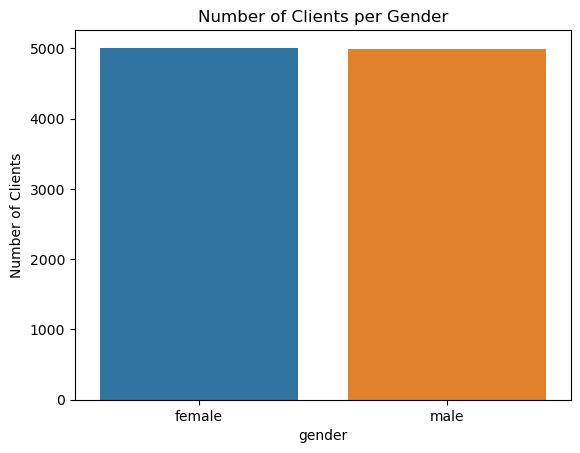

In [55]:
sns.countplot(data=df,x="gender")
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients");

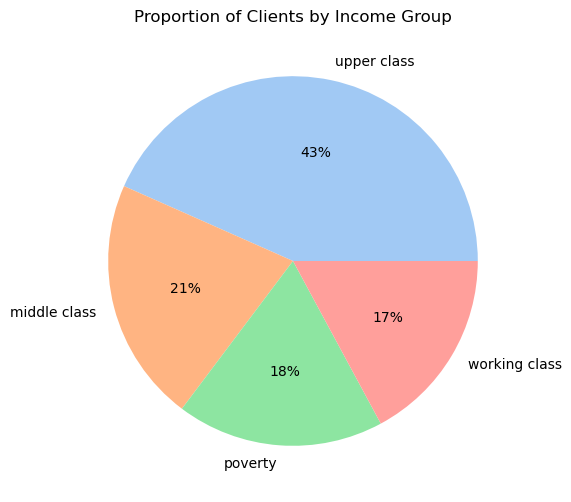

In [56]:
plt.figure(figsize=[6,6])


data = df["income"].value_counts(normalize=True)


labels = ["upper class","middle class","poverty","working class"]

colors = sns.color_palette('pastel')


plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Clients by Income Group");

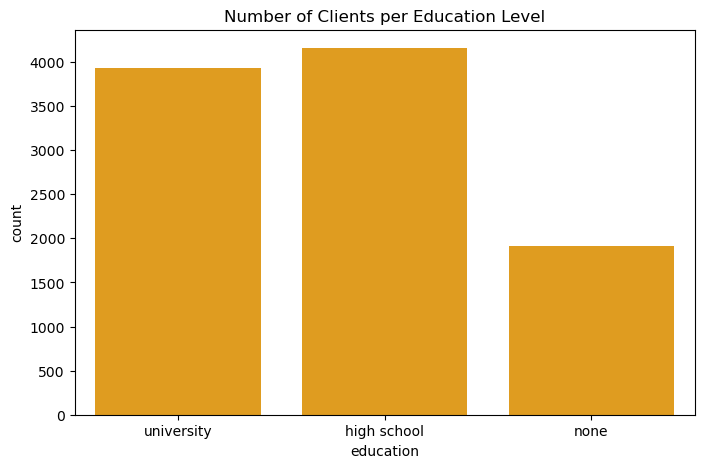

In [57]:
plt.figure(figsize=[8,5])
sns.countplot(data=df,x="education",
              order=["university","high school","none"],color="orange")
plt.title("Number of Clients per Education Level");

In [58]:
df["credit_score"].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

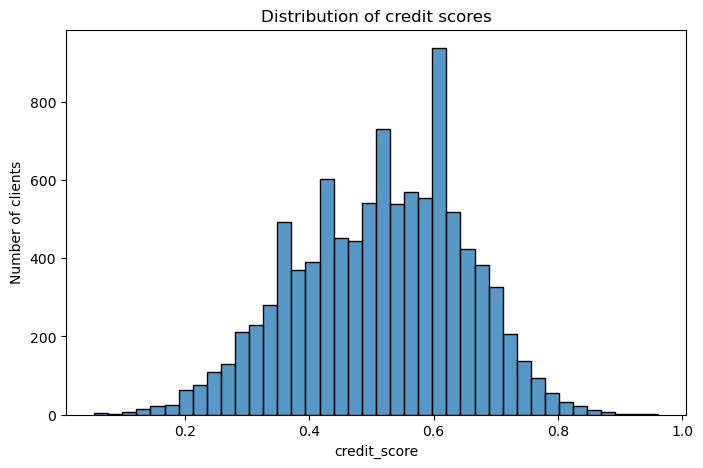

In [59]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="credit_score",bins=40).set(
    title="Distribution of credit scores",ylabel="Number of clients");

In [60]:
corr_matrix = df[["speeding_violations","DUIs","past_accidents"]].corr()
corr_matrix

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000000,0.359838,0.443074
DUIs,0.359838,1.000000,0.259359
past_accidents,0.443074,0.259359,1.000000


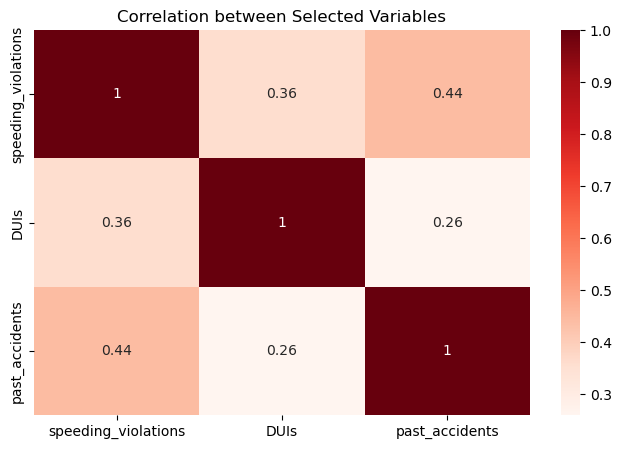

In [61]:
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.title("Correlation between Selected Variables");

In [62]:
#Check the mean annual mileage per category in the outcome column
df.groupby('outcome')['annual_mileage'].mean()

outcome
False    11375.549735
True     12401.574221
Name: annual_mileage, dtype: float64

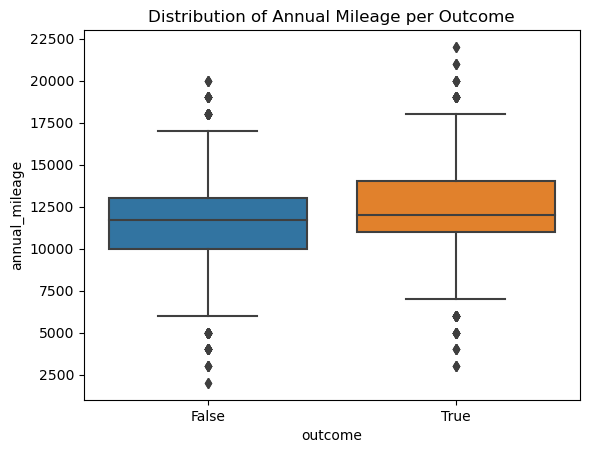

In [63]:
#Plot two boxplots to compare dispersion
sns.boxplot(data=df,x='outcome', y='annual_mileage')
plt.title("Distribution of Annual Mileage per Outcome");

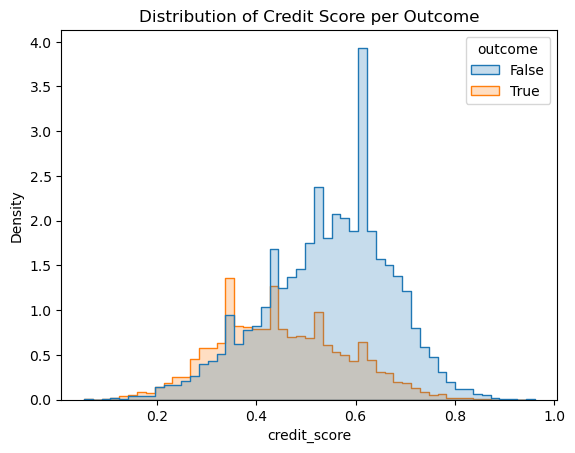

In [64]:
#Create histograms to compare distribution 
sns.histplot(df,x="credit_score",hue="outcome",element="step",stat="density")
plt.title("Distribution of Credit Score per Outcome");

In [65]:
#Create a new "claim rate" column
df['claim_rate'] = np.where(df['outcome']==True,1,0)
df['claim_rate'].value_counts()

0    6867
1    3133
Name: claim_rate, dtype: int64

In [66]:
#Create a pivot table for education and income with average claim rate as values
edu_income = pd.pivot_table(data=df,index='education',columns='income',
                            values='claim_rate',aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


Text(0.5, 1.0, 'Education Level and Income Class')

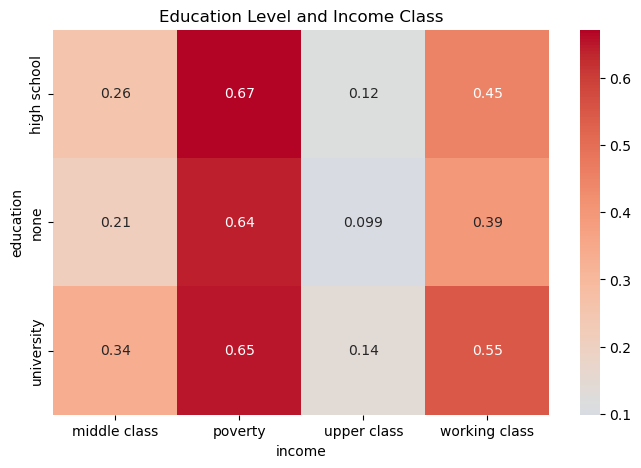

In [67]:
#Create a heatmap to visualize income, education and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(edu_income,annot=True,cmap='coolwarm',center=0.117)
plt.title("Education Level and Income Class")

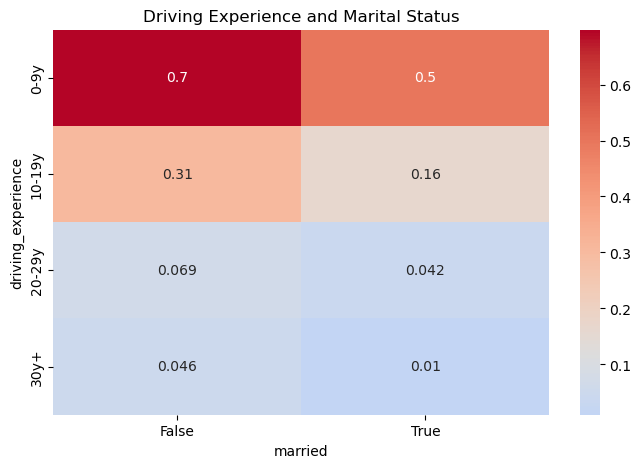

In [68]:
#Create pivot table for driving experience and marital status with average claim rate as values
driv_married = pd.pivot_table(data=df,index='driving_experience',columns='married',values='claim_rate')

#Create a heatmap to visualize driving experience, marital status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(driv_married,annot=True,cmap='coolwarm', center=0.117)
plt.title("Driving Experience and Marital Status");

Text(0.5, 1.0, 'Gender and Family Status')

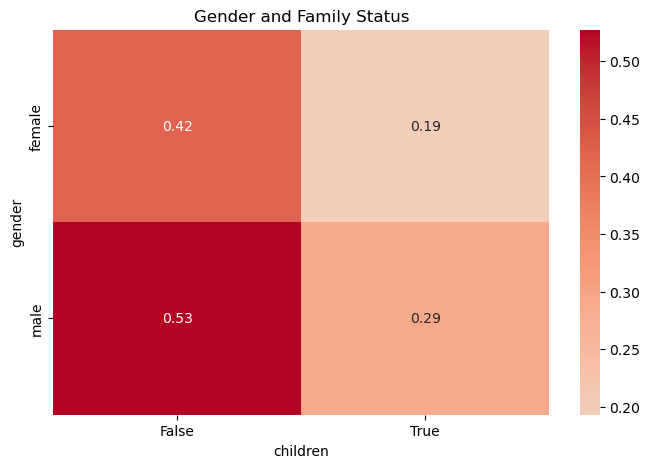

In [69]:
#Create pivot table for gender and family status with average claim rate as values
gender_children = pd.pivot_table(data=df,index='gender',columns='children',values='claim_rate')

#Create a heatmap to visualize gender, family status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.117)
plt.title("Gender and Family Status")